In [ ]:
!pip install wbdata duckdb

import wbdata
import duckdb
import pandas as pd
import datetime
countries = ['USA', 'GB', 'IN', 'KE', 'BR']

indicators = {
    'SP.DYN.LE00.IN': 'life_expectancy',
    'SH.DYN.MORT': 'under5_mortality',
    'SP.ADO.TFRT': 'adolescent_fertility'
}

df = wbdata.get_dataframe(indicators, country=countries)
df = df.reset_index()

df['year'] = pd.to_datetime(df['date']).dt.year

df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

In [ ]:
duckdb.sql("CREATE OR REPLACE VIEW wdi_raw AS SELECT * FROM df")

df_clean = duckdb.sql("""
SELECT
  country,
  year,
  MAX(life_expectancy) AS life_expectancy,
  MAX(under5_mortality) AS under5_mortality,
  MAX(adolescent_fertility) AS adolescent_fertility
FROM wdi_raw
GROUP BY country, year
ORDER BY country, year
""").df()

df_clean.head()

,country,year,life_expectancy,under5_mortality,adolescent_fertility
0,Brazil,2000,69.584,34.5,85.611
1,Brazil,2001,69.980,32.2,84.155
2,Brazil,2002,70.396,30.1,81.131
3,Brazil,2003,70.884,28.1,78.025
4,Brazil,2004,71.361,26.3,76.900


In [ ]:
df_clean.to_csv("population_dynamics_clean.csv", index=False)
from google.colab import files
files.download("population_dynamics_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

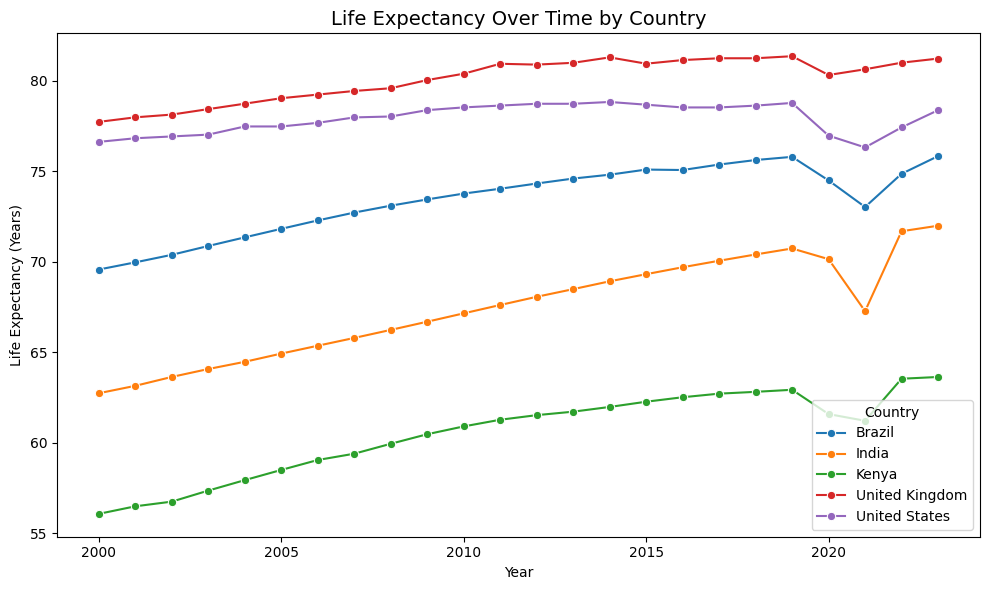

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_clean,
    x="year",
    y="life_expectancy",
    hue="country",          # Color by country
    marker="o"              # Optional: add points to the line
)

plt.title("Life Expectancy Over Time by Country", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

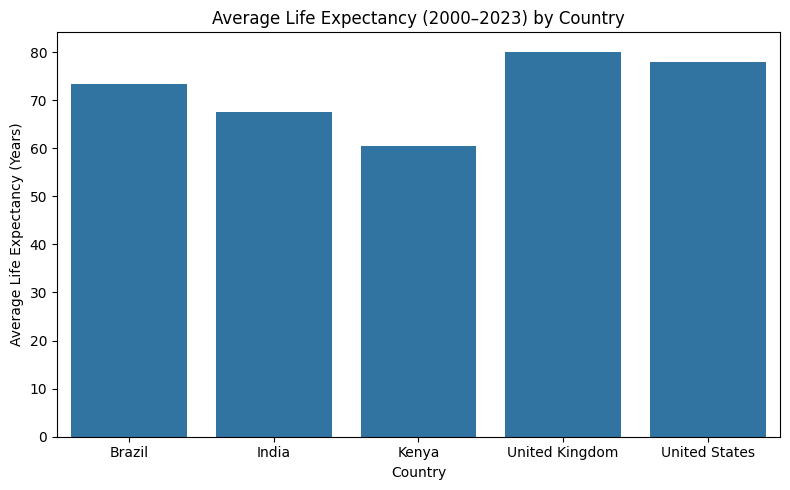

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of average life expectancy per country
avg_life_exp = df_clean.groupby("country")["life_expectancy"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_life_exp, x="country", y="life_expectancy")
plt.title("Average Life Expectancy (2000–2023) by Country")
plt.ylabel("Average Life Expectancy (Years)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()